In [15]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

%matplotlib inline

In [16]:
diabetes_dataframe = pd.read_csv("./Diabetes dataset/Clean_diabetes_dataset.csv")
diabetes_dataframe.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
corr_matrix = diabetes_dataframe.corr()
corr_matrix["Outcome"]*100


Unnamed: 0                   -2.868235
Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
SkinThickness                 3.067563
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

<Axes: >

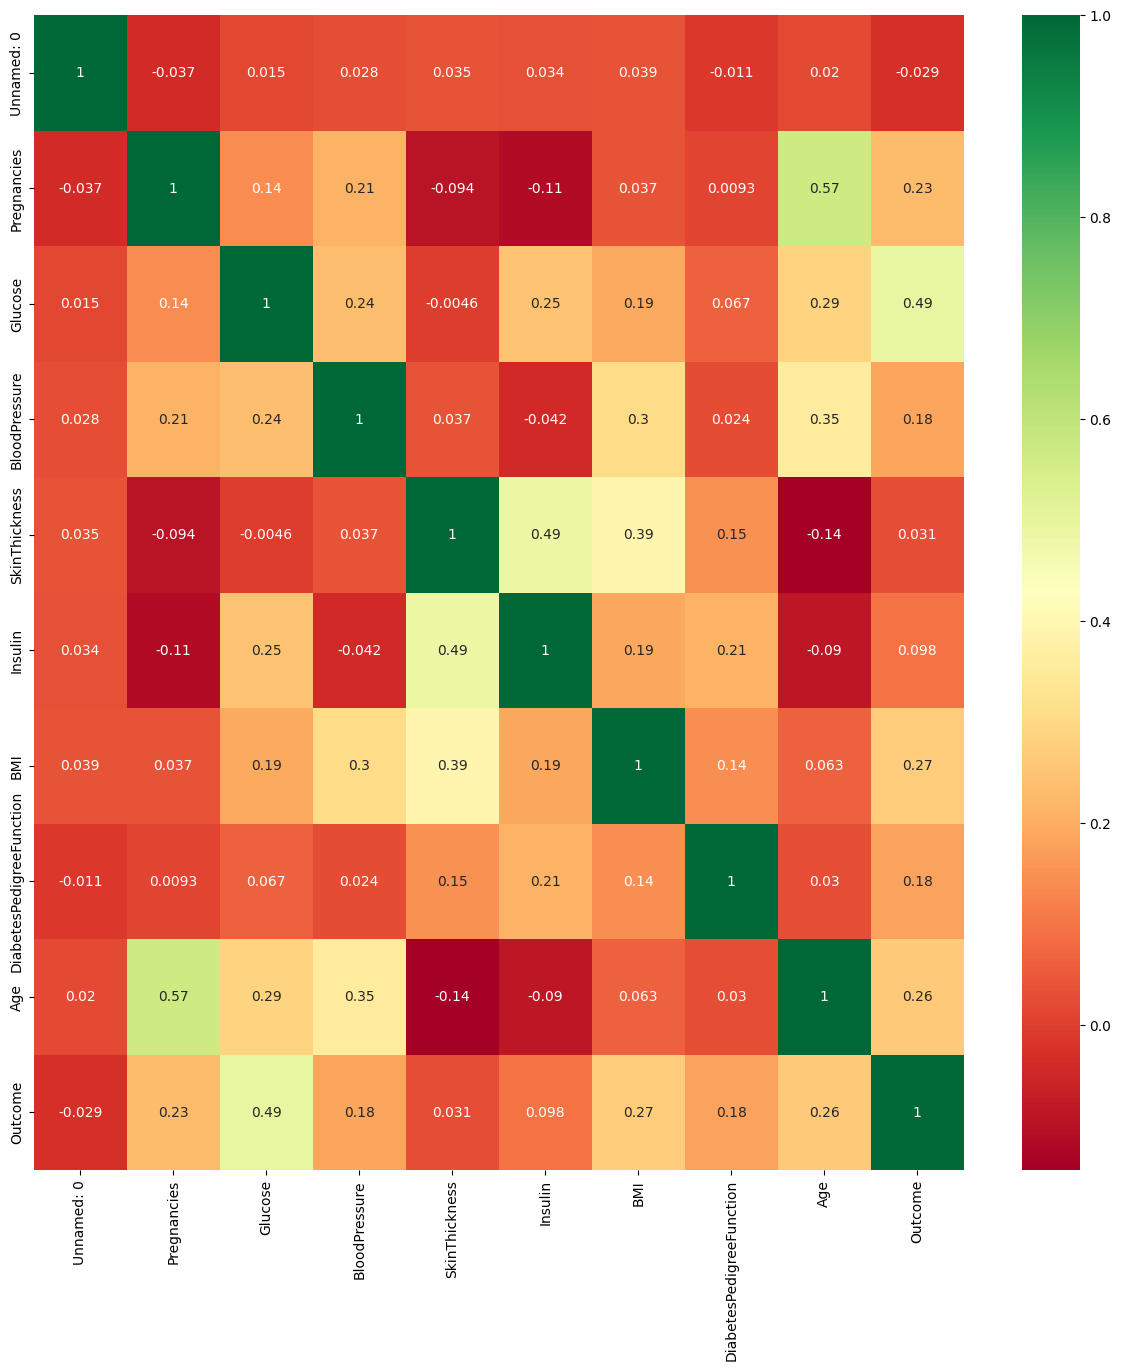

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(diabetes_dataframe.corr(), annot=True, cmap='RdYlGn')

In [19]:
diabetes_dataframe.drop( columns=["Unnamed: 0","SkinThickness","Insulin"], inplace=True)

In [20]:
diabetes_dataframe.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,5,116,74,25.6,0.201,30,0


In [21]:
X = diabetes_dataframe.drop(['Outcome'], axis='columns')
y = diabetes_dataframe.Outcome
print(X.shape,y.shape)

(639, 6) (639,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
len(X_train),len(X_test)

(511, 128)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)
print("----------------------")
print(X_test_sc)

[[-8.79417944e-01  1.00420719e+00 -3.93266230e-01 -4.28419343e-01
  -3.23522803e-01  8.04213916e-01]
 [-1.18595449e+00  6.94707870e-01 -6.56646365e-01  1.61600306e+00
   3.54370181e-03 -8.03165397e-01]
 [ 3.46728221e-01  7.57092274e-02  1.18701458e+00  4.01646894e-01
  -5.58851142e-01  5.24259398e-04]
 ...
 [-5.72881403e-01 -6.12067043e-01  1.18701458e+00  2.06177937e+00
  -1.20899554e+00 -8.92464248e-01]
 [-2.66344862e-01 -1.30623654e-01  1.33494041e-01 -8.89567252e-01
  -1.28876785e+00 -8.03165397e-01]
 [-8.79417944e-01 -9.62348401e-02  1.36260134e+00  3.70903700e-01
  -1.08137544e-01  6.25616214e-01]]
----------------------
[[-2.66344862e-01 -1.26545450e+00 -1.27120001e+00  3.40160506e-01
  -3.75374810e-01 -7.13866546e-01]
 [-2.66344862e-01 -1.05912162e+00  1.33494041e-01 -2.59331776e-01
   4.82177612e-01  4.47018513e-01]
 [ 1.26633784e+00 -4.40122975e-01  6.60254312e-01 -1.15088440e+00
   1.69870547e+00  8.98231101e-02]
 [-2.66344862e-01  2.44853736e+00 -3.93266230e-01 -1.82473791e

In [24]:
X_train_sc = pd.DataFrame(X_train_sc, columns=["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"])
X_test_sc = pd.DataFrame(X_test_sc, columns=["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction","Age"])
print("Length of X_train_sc => ",len(X_train_sc))
print("Length of X_test_sc => ",len(X_test_sc))
X_train_sc

Length of X_train_sc =>  511
Length of X_test_sc =>  128


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,-0.879418,1.004207,-0.393266,-0.428419,-0.323523,0.804214
1,-1.185954,0.694708,-0.656646,1.616003,0.003544,-0.803165
2,0.346728,0.075709,1.187015,0.401647,-0.558851,0.000524
3,1.879411,1.416873,-0.393266,-1.012540,-0.415261,1.250708
4,-0.266345,1.038596,0.309081,-1.704262,-0.889906,0.357720
...,...,...,...,...,...,...
506,0.040192,0.110098,0.660254,-0.013386,0.051407,0.089823
507,-0.266345,1.726372,-0.744440,0.370904,-0.295602,-0.267372
508,-0.572881,-0.612067,1.187015,2.061779,-1.208996,-0.892464
509,-0.266345,-0.130624,0.133494,-0.889567,-1.288768,-0.803165


In [25]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (6,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_sc, y_train, epochs=5000)

KeyboardInterrupt: 

In [ ]:
acc = model.evaluate(X_test_sc,y_test)
print("accuracy => ", acc[1]*100,"%") # best -> 81.25 %

4/4 [==============================] - 0s 4ms/step - loss: 0.4233 - accuracy: 0.8125
accuracy =>  81.25 %


In [ ]:
coef, intercept = model.get_weights()
coef, intercept

In [ ]:
# sigmoid function
import math
def sigmoid(x):
    return 1/(1+ math.exp(-x))

# check sgm fun
sigmoid(198.59557)


In [ ]:
# function of prediction 
clms = X_test_sc.columns

def prediction_func (Pregnancies,Glucose,BloodPressure,Insulin,BMI,dp,Age):
    weighted_sum = (
        coef[0]*Pregnancies +
        coef[1]*Glucose+
        coef[2]*BloodPressure+
        coef[3]*Insulin+
        coef[4]*BMI+
        coef[5]*dp+
        coef[6]*Age+
        intercept
    )
    return sigmoid(weighted_sum)
       
# [198.59557]

In [ ]:
def log_loss (y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)* np.log(1-y_predicted_new))

In [ ]:
# gradient descent function
def gradient_descent(Pregnancies,Glucose,BloodPressure, Insulin,BMI,DiabetesPedigreeFunction,Age, y_true, epochs, loss_thresold):
    # w1, w2, bias
    w1 = w2 =w3=w4=w5=w6=w7 = 1
    bias = 0
    rate = 0.5
    n = len(Pregnancies)
    
    for i in range(epochs):
        weighted_sum = w1*Pregnancies + w2*Glucose + w3*BloodPressure + w4*Insulin + w5*BMI + w6*DiabetesPedigreeFunction + w7*Age + bias
        y_predicted = sigmoid
                       